In [0]:
#final delivery 2
#https://www.kaggle.com/datasets/georgejnr/used-and-new-cars-datasets

#Environmen Preparation

In [0]:
#pip install pysparkling

In [0]:
#pip install h2o

<div style="background-color:#F7CAC9; color:#4A3C31; padding:10px;">
    
# Data Understanding



</div>

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [0]:
spark=SparkSession.builder.appName('Used-Car-Price').getOrCreate()

In [0]:
#Understanding Data Types
df= spark.read.csv('/FileStore/tables/cleaned_car.csv',inferSchema=True,header=True)
df.printSchema()



root
 |-- #: integer (nullable = true)
 |-- Model: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Status: string (nullable = true)
 |-- Mileage: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- Manufacturer's Suggested Retail Price: string (nullable = true)
 |-- Price - MSRP: string (nullable = true)
 |-- Brand: string (nullable = true)



In [0]:
#Calculate the number of NA
columns = df.columns

for col in columns:
    null_count = df.filter(df[col].isNull()).count()
    print(f"Column '{col}' has {null_count} null values.")
    
total_null_count = df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).first()
total_null_count_dict = total_null_count.asDict()

print(f"Total null values in the dataframe: {total_null_count}")


Column '#' has 0 null values.
Column 'Model' has 0 null values.
Column 'Year' has 0 null values.
Column 'Status' has 0 null values.
Column 'Mileage' has 0 null values.
Column 'Price' has 0 null values.
Column 'Manufacturer's Suggested Retail Price' has 0 null values.
Column 'Price - MSRP' has 0 null values.
Column 'Brand' has 0 null values.
Total null values in the dataframe: Row(#=0, Model=0, Year=0, Status=0, Mileage=0, Price=0, Manufacturer's Suggested Retail Price=0, Price - MSRP=0, Brand=0)


In [0]:
df.show()

+---+--------------------+----+------+-------------+--------+-------------------------------------+------------+-----+
|  #|               Model|Year|Status|      Mileage|   Price|Manufacturer's Suggested Retail Price|Price - MSRP|Brand|
+---+--------------------+----+------+-------------+--------+-------------------------------------+------------+-----+
|  0|2023 Acura RDX A-...|2023|   New|Not available|50895.00|                        Not specified|     #VALUE!|Acura|
|  1|2023 Acura TLX Ty...|2023|   New|Not available|57745.00|                        Not specified|     #VALUE!|Acura|
|  2|2023 Acura TLX Ty...|2023|   New|Not available|57545.00|                        Not specified|     #VALUE!|Acura|
|  3|2023 Acura TLX Ty...|2023|   New|Not available|57745.00|                        Not specified|     #VALUE!|Acura|
|  4|2023 Acura TLX A-...|2023|   New|Not available|47995.00|                        Not specified|     #VALUE!|Acura|
|  5|2022 Acura TLX A-...|2022|   New|Not availa

In [0]:
df = df.drop('_c0')
df.show(10)

+---+--------------------+----+------+-------------+--------+-------------------------------------+------------+-----+
|  #|               Model|Year|Status|      Mileage|   Price|Manufacturer's Suggested Retail Price|Price - MSRP|Brand|
+---+--------------------+----+------+-------------+--------+-------------------------------------+------------+-----+
|  0|2023 Acura RDX A-...|2023|   New|Not available|50895.00|                        Not specified|     #VALUE!|Acura|
|  1|2023 Acura TLX Ty...|2023|   New|Not available|57745.00|                        Not specified|     #VALUE!|Acura|
|  2|2023 Acura TLX Ty...|2023|   New|Not available|57545.00|                        Not specified|     #VALUE!|Acura|
|  3|2023 Acura TLX Ty...|2023|   New|Not available|57745.00|                        Not specified|     #VALUE!|Acura|
|  4|2023 Acura TLX A-...|2023|   New|Not available|47995.00|                        Not specified|     #VALUE!|Acura|
|  5|2022 Acura TLX A-...|2022|   New|Not availa

In [0]:
element_count = df.groupBy('Mileage').count().orderBy('count', ascending=False)
element_count.show(7)

+-------------+-----+
|      Mileage|count|
+-------------+-----+
|Not available|47868|
|          310|  101|
|       23,000|   19|
|        1,000|   18|
|       29,000|   17|
|       35,000|   17|
|       45,000|   13|
+-------------+-----+
only showing top 7 rows



#Data Preparation

In [0]:
from pyspark.sql.types import IntegerType

In [0]:
#Clean up the Mileage column, mark the new car as 0 mi, then delete the characters and keep the numbers
from pyspark.sql.functions import col, when
df = df.withColumn("Mileage", when(col("Mileage") == "Not available", "0 mi.").otherwise(col("Mileage")))
df = df.withColumn('Mileage', regexp_replace(col('Mileage'), ' mi.', ''))
df = df.withColumn('Mileage', regexp_replace(col('Mileage'), ',', ''))
df.show()

+---+--------------------+----+------+-------+--------+-------------------------------------+------------+-----+
|  #|               Model|Year|Status|Mileage|   Price|Manufacturer's Suggested Retail Price|Price - MSRP|Brand|
+---+--------------------+----+------+-------+--------+-------------------------------------+------------+-----+
|  0|2023 Acura RDX A-...|2023|   New|      0|50895.00|                        Not specified|     #VALUE!|Acura|
|  1|2023 Acura TLX Ty...|2023|   New|      0|57745.00|                        Not specified|     #VALUE!|Acura|
|  2|2023 Acura TLX Ty...|2023|   New|      0|57545.00|                        Not specified|     #VALUE!|Acura|
|  3|2023 Acura TLX Ty...|2023|   New|      0|57745.00|                        Not specified|     #VALUE!|Acura|
|  4|2023 Acura TLX A-...|2023|   New|      0|47995.00|                        Not specified|     #VALUE!|Acura|
|  5|2022 Acura TLX A-...|2022|   New|      0|49545.00|                        Not specified|   

In [0]:
#Change Mileage data type
df = df.withColumn("Mileage", when(col("Mileage").rlike("^[0-9]+$"), col("Mileage")).otherwise("0"))
df = df.withColumn("Mileage", col("Mileage").cast(IntegerType()))
df.printSchema()
df.show()

root
 |-- #: integer (nullable = true)
 |-- Model: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Status: string (nullable = true)
 |-- Mileage: integer (nullable = true)
 |-- Price: string (nullable = true)
 |-- Manufacturer's Suggested Retail Price: string (nullable = true)
 |-- Price - MSRP: string (nullable = true)
 |-- Brand: string (nullable = true)

+---+--------------------+----+------+-------+--------+-------------------------------------+------------+-----+
|  #|               Model|Year|Status|Mileage|   Price|Manufacturer's Suggested Retail Price|Price - MSRP|Brand|
+---+--------------------+----+------+-------+--------+-------------------------------------+------------+-----+
|  0|2023 Acura RDX A-...|2023|   New|      0|50895.00|                        Not specified|     #VALUE!|Acura|
|  1|2023 Acura TLX Ty...|2023|   New|      0|57745.00|                        Not specified|     #VALUE!|Acura|
|  2|2023 Acura TLX Ty...|2023|   New|      0|57545.00| 

###Clean Price col

In [0]:
element_count_price = df.groupBy('Price').count().orderBy('count', ascending=False)
element_count_price.show(6)
price_count=df.select(col('Price')).count()
print('There are',price_count,'valid data in total')

+----------+-----+
|     Price|count|
+----------+-----+
|Not Priced|  652|
|  29995.00|  267|
|  34995.00|  245|
|  39995.00|  217|
|  72010.00|  201|
|  19995.00|  196|
+----------+-----+
only showing top 6 rows

There are 115762 valid data in total


In [0]:
#Since the proportion of not price data in the whole data is too small,  drop the not price data
df = df.filter(df.Price !='Not Priced')
df.select(col('Price')).count()


Out[18]: 115110

In [0]:
df.count()

Out[19]: 115110

In [0]:
len(df.columns)

Out[20]: 9

In [0]:
df = df.withColumn('Price', regexp_replace(col('Price'), ',', ''))
df.show()

+---+--------------------+----+------+-------+--------+-------------------------------------+------------+-----+
|  #|               Model|Year|Status|Mileage|   Price|Manufacturer's Suggested Retail Price|Price - MSRP|Brand|
+---+--------------------+----+------+-------+--------+-------------------------------------+------------+-----+
|  0|2023 Acura RDX A-...|2023|   New|      0|50895.00|                        Not specified|     #VALUE!|Acura|
|  1|2023 Acura TLX Ty...|2023|   New|      0|57745.00|                        Not specified|     #VALUE!|Acura|
|  2|2023 Acura TLX Ty...|2023|   New|      0|57545.00|                        Not specified|     #VALUE!|Acura|
|  3|2023 Acura TLX Ty...|2023|   New|      0|57745.00|                        Not specified|     #VALUE!|Acura|
|  4|2023 Acura TLX A-...|2023|   New|      0|47995.00|                        Not specified|     #VALUE!|Acura|
|  5|2022 Acura TLX A-...|2022|   New|      0|49545.00|                        Not specified|   

##Change Price data type

In [0]:
df = df.withColumn('price', regexp_replace(col('price'), '[$€£¥]', ''))

df.printSchema()
df.show(5)

root
 |-- #: integer (nullable = true)
 |-- Model: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Status: string (nullable = true)
 |-- Mileage: integer (nullable = true)
 |-- price: string (nullable = true)
 |-- Manufacturer's Suggested Retail Price: string (nullable = true)
 |-- Price - MSRP: string (nullable = true)
 |-- Brand: string (nullable = true)

+---+--------------------+----+------+-------+--------+-------------------------------------+------------+-----+
|  #|               Model|Year|Status|Mileage|   price|Manufacturer's Suggested Retail Price|Price - MSRP|Brand|
+---+--------------------+----+------+-------+--------+-------------------------------------+------------+-----+
|  0|2023 Acura RDX A-...|2023|   New|      0|50895.00|                        Not specified|     #VALUE!|Acura|
|  1|2023 Acura TLX Ty...|2023|   New|      0|57745.00|                        Not specified|     #VALUE!|Acura|
|  2|2023 Acura TLX Ty...|2023|   New|      0|57545.00| 

In [0]:
df = df.withColumn('price', col('price').cast('integer'))
df.printSchema()
df.show(5)

root
 |-- #: integer (nullable = true)
 |-- Model: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Status: string (nullable = true)
 |-- Mileage: integer (nullable = true)
 |-- price: integer (nullable = true)
 |-- Manufacturer's Suggested Retail Price: string (nullable = true)
 |-- Price - MSRP: string (nullable = true)
 |-- Brand: string (nullable = true)

+---+--------------------+----+------+-------+-----+-------------------------------------+------------+-----+
|  #|               Model|Year|Status|Mileage|price|Manufacturer's Suggested Retail Price|Price - MSRP|Brand|
+---+--------------------+----+------+-------+-----+-------------------------------------+------------+-----+
|  0|2023 Acura RDX A-...|2023|   New|      0|50895|                        Not specified|     #VALUE!|Acura|
|  1|2023 Acura TLX Ty...|2023|   New|      0|57745|                        Not specified|     #VALUE!|Acura|
|  2|2023 Acura TLX Ty...|2023|   New|      0|57545|                  

##Status col understanding and cleaning

In [0]:
element_count_Status = df.groupBy('Status').count().orderBy('Status', ascending=False)
element_count_Status.show()


+--------------------+-----+
|              Status|count|
+--------------------+-----+
|Volkswagen Certified|  797|
|                Used|61627|
|    Toyota Certified|  183|
|   Porsche Certified| 1914|
|                 New|47434|
|  INFINITI Certified|  865|
|      Ford Certified|   29|
|     Dodge Certified|  388|
| Chevrolet Certified|  211|
|       BMW Certified|  609|
|     Acura Certified| 1053|
+--------------------+-----+



In [0]:
from pyspark.sql.functions import when, col
df = df.withColumn('Status', when(col('Status').isin(['Used', 'New']), col('Status')).otherwise('Certified'))

element_count_Status = df.groupBy('Status').count().orderBy('Status', ascending=False)
element_count_Status.show()

+---------+-----+
|   Status|count|
+---------+-----+
|     Used|61627|
|      New|47434|
|Certified| 6049|
+---------+-----+



##Extract the brand from the car model into a new column

In [0]:
from pyspark.sql.functions import split
df = df.withColumn('Brand', split(df['Model'], ' ').getItem(1))
df.show()

+---+--------------------+----+------+-------+-----+-------------------------------------+------------+-----+
|  #|               Model|Year|Status|Mileage|price|Manufacturer's Suggested Retail Price|Price - MSRP|Brand|
+---+--------------------+----+------+-------+-----+-------------------------------------+------------+-----+
|  0|2023 Acura RDX A-...|2023|   New|      0|50895|                        Not specified|     #VALUE!|Acura|
|  1|2023 Acura TLX Ty...|2023|   New|      0|57745|                        Not specified|     #VALUE!|Acura|
|  2|2023 Acura TLX Ty...|2023|   New|      0|57545|                        Not specified|     #VALUE!|Acura|
|  3|2023 Acura TLX Ty...|2023|   New|      0|57745|                        Not specified|     #VALUE!|Acura|
|  4|2023 Acura TLX A-...|2023|   New|      0|47995|                        Not specified|     #VALUE!|Acura|
|  5|2022 Acura TLX A-...|2022|   New|      0|49545|                        Not specified|     #VALUE!|Acura|
|  6|2023 

In [0]:
element_count_Brand = df.groupBy('Brand').count().orderBy('Brand', ascending=False)
element_count_Brand.show()

+-------------+-----+
|        Brand|count|
+-------------+-----+
|   Volkswagen| 9968|
|       Toyota| 5709|
|        Tesla| 9068|
|      Porsche| 9961|
|Mercedes-Benz|10100|
|        Lexus| 9965|
|     INFINITI| 8664|
|      Hyundai| 8280|
|         Ford| 4465|
|        Dodge| 9819|
|    Chevrolet| 9914|
|          BMW| 9827|
|        Acura| 9370|
+-------------+-----+



In [0]:
df.select('Mileage','price').describe().show()

+-------+-----------------+------------------+
|summary|          Mileage|             price|
+-------+-----------------+------------------+
|  count|           115110|            115110|
|   mean| 28279.3212579272| 51517.98868908001|
| stddev|38055.55058284511|37931.870683468806|
|    min|                0|              1800|
|    max|           974302|           2499900|
+-------+-----------------+------------------+



##Clean outliers

In [0]:
quantiles = {
    c: dict(
        zip(["q1", "q3"], df.approxQuantile(c, [0.25, 0.75], 0))
    )
    for c in ["price"]
}
quantiles

Out[29]: {'price': {'q1': 29980.0, 'q3': 61280.0}}

In [0]:
for i in quantiles:
    iqr = quantiles[i]['q3'] - quantiles[i]['q1']
    quantiles[i]['lower_bound'] = quantiles[i]['q1'] - (iqr * 1.5)
    quantiles[i]['upper_bound'] = quantiles[i]['q3'] + (iqr * 1.5)
print(quantiles)

{'price': {'q1': 29980.0, 'q3': 61280.0, 'lower_bound': -16970.0, 'upper_bound': 108230.0}}


In [0]:
import pyspark.sql.functions as f
df_clean=df.select(
    "*",
    *[
        f.when(
            f.col(c).between(quantiles[c]['lower_bound'], quantiles[c]['upper_bound']),
            0
        ).otherwise(1).alias(c+"_out") 
        for c in ["price"]
    ]
)
df_clean.show(10)

+---+--------------------+----+------+-------+-----+-------------------------------------+------------+-----+---------+
|  #|               Model|Year|Status|Mileage|price|Manufacturer's Suggested Retail Price|Price - MSRP|Brand|price_out|
+---+--------------------+----+------+-------+-----+-------------------------------------+------------+-----+---------+
|  0|2023 Acura RDX A-...|2023|   New|      0|50895|                        Not specified|     #VALUE!|Acura|        0|
|  1|2023 Acura TLX Ty...|2023|   New|      0|57745|                        Not specified|     #VALUE!|Acura|        0|
|  2|2023 Acura TLX Ty...|2023|   New|      0|57545|                        Not specified|     #VALUE!|Acura|        0|
|  3|2023 Acura TLX Ty...|2023|   New|      0|57745|                        Not specified|     #VALUE!|Acura|        0|
|  4|2023 Acura TLX A-...|2023|   New|      0|47995|                        Not specified|     #VALUE!|Acura|        0|
|  5|2022 Acura TLX A-...|2022|   New|  

In [0]:
from pyspark.sql.functions import col
df_clean=df_clean.withColumn("outliers", col("price_out"))
df_clean.show()

+---+--------------------+----+------+-------+-----+-------------------------------------+------------+-----+---------+--------+
|  #|               Model|Year|Status|Mileage|price|Manufacturer's Suggested Retail Price|Price - MSRP|Brand|price_out|outliers|
+---+--------------------+----+------+-------+-----+-------------------------------------+------------+-----+---------+--------+
|  0|2023 Acura RDX A-...|2023|   New|      0|50895|                        Not specified|     #VALUE!|Acura|        0|       0|
|  1|2023 Acura TLX Ty...|2023|   New|      0|57745|                        Not specified|     #VALUE!|Acura|        0|       0|
|  2|2023 Acura TLX Ty...|2023|   New|      0|57545|                        Not specified|     #VALUE!|Acura|        0|       0|
|  3|2023 Acura TLX Ty...|2023|   New|      0|57745|                        Not specified|     #VALUE!|Acura|        0|       0|
|  4|2023 Acura TLX A-...|2023|   New|      0|47995|                        Not specified|     #V

In [0]:
# dropping outliers
df_clean = df_clean.filter((df_clean.outliers == 0) )
df_clean=df_clean.select(["Model","Year", "Status", "Mileage","price","Manufacturer's Suggested Retail Price", "Brand"])
df.select('price','Mileage').describe().show()

+-------+------------------+-----------------+
|summary|             price|          Mileage|
+-------+------------------+-----------------+
|  count|            115110|           115110|
|   mean| 51517.98868908001| 28279.3212579272|
| stddev|37931.870683468806|38055.55058284511|
|    min|              1800|                0|
|    max|           2499900|           974302|
+-------+------------------+-----------------+



In [0]:
import numpy as np
print("proportion of the lost Rows: ",np.round((df.count()-df_clean.count())/df.count(),4))
#We only delete a small part of the data, which does not constitute a mailbox for subsequent processing

proportion of the lost Rows:  0.0712


#Data Visualization

In [0]:
df_clean.registerTempTable("dataclean")
display(sqlContext.sql("select * from dataclean"))

/databricks/spark/python/pyspark/sql/dataframe.py:234: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


Model,Year,Status,Mileage,price,Manufacturer's Suggested Retail Price,Brand
2023 Acura RDX A-Spec,2023,New,0,50895,Not specified,Acura
2023 Acura TLX Type S,2023,New,0,57745,Not specified,Acura
2023 Acura TLX Type S,2023,New,0,57545,Not specified,Acura
2023 Acura TLX Type S,2023,New,0,57745,Not specified,Acura
2023 Acura TLX A-Spec,2023,New,0,47995,Not specified,Acura
2022 Acura TLX A-Spec,2022,New,0,49545,Not specified,Acura
2023 Acura MDX Type S w/Advance Package,2023,New,0,75590,Not specified,Acura
2023 Acura RDX A-Spec Advance,2023,New,0,55345,Not specified,Acura
2023 Acura RDX A-Spec Advance,2023,New,0,55045,Not specified,Acura
2023 Acura TLX Type S,2023,New,0,56445,Not specified,Acura


Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

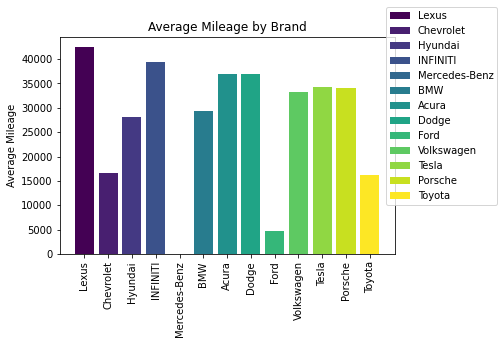

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a PySpark DataFrame called `df` with columns `Brand` and `Mileage`
# Group the DataFrame by `Brand` and compute the average mileage for each brand
avg_mileage_df = df.groupBy('Brand').avg('Mileage')

# Convert the PySpark DataFrame to a Pandas DataFrame
avg_mileage_pd = avg_mileage_df.toPandas()

# Get a list of unique brands and their counts
unique_brands = avg_mileage_pd['Brand'].unique()
num_brands = len(unique_brands)

# Create a color map using a colormap from matplotlib
cmap = plt.cm.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, num_brands))

# Create a figure and axis object using matplotlib
fig, ax = plt.subplots()

# Create a bar chart using matplotlib
bars = []
for i, brand in enumerate(unique_brands):
    brand_data = avg_mileage_pd[avg_mileage_pd['Brand'] == brand]
    bar = ax.bar(i, brand_data['avg(Mileage)'], color=colors[i])
    bars.append(bar)

# Set the title and axis labels
ax.set_title('Average Mileage by Brand')
ax.set_ylabel('Average Mileage')

# Set the x-axis tick labels to be the brands listed vertically
ax.set_xticks(np.arange(num_brands))
ax.set_xticklabels(unique_brands, rotation='vertical', ha='center')

# Create the color key in the far top right corner
fig.legend(bars, unique_brands, loc='upper right', bbox_to_anchor=(1.15, 1))

# Display the chart
plt.show()

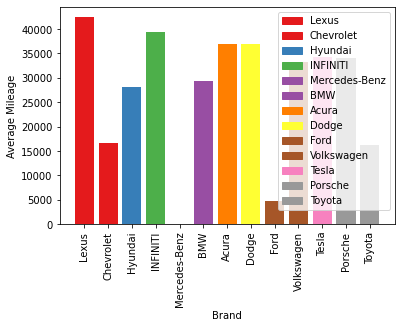

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql.functions import col, avg
from pyspark.sql.types import FloatType

# Assuming you have a PySpark DataFrame called `df` with columns `Brand` and `Mileage`

# Calculate the average mileage per brand
avg_mileage = df.groupBy("Brand").agg(avg(col("Mileage")).alias("avg_mileage"))

# Convert the PySpark DataFrame to a Pandas DataFrame
avg_mileage_pd = avg_mileage.toPandas()

# Create a color map
color_map = plt.get_cmap('Set1')

# Create a figure and axis object using matplotlib
fig, ax = plt.subplots()

# Set the color map for the bars
bar_colors = color_map(np.linspace(0, 1, len(avg_mileage_pd)))

# Create a bar chart using matplotlib
ax.bar(avg_mileage_pd["Brand"], avg_mileage_pd["avg_mileage"], color=bar_colors)

# Set the x-axis and y-axis labels
ax.set_xlabel("Brand")
ax.set_ylabel("Average Mileage")

# Rotate the x-axis tick labels to display the brand names vertically
plt.xticks(rotation=90)

# Create a color key in the top right corner
handles = [plt.Rectangle((0,0),1,1, color=bar_colors[i]) for i in range(len(avg_mileage_pd))]
labels = avg_mileage_pd["Brand"].values.tolist()
plt.legend(handles, labels, loc='upper right')

# Display the chart
plt.show()


<div style="background-color:#F7CAC9; color:#4A3C31; padding:10px;">

# Modeling

</div>

##Random Forest

In [0]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col

In [0]:
df1=df_clean
modelIndexer = StringIndexer(inputCol="Model", outputCol="ModelIndex")
statusIndexer = StringIndexer(inputCol="Status", outputCol="StatusIndex")
brandIndexer = StringIndexer(inputCol="Brand", outputCol="BrandIndex")
indexed = modelIndexer.fit(df_clean).transform(df_clean)
indexed = statusIndexer.fit(indexed).transform(indexed)
indexed = brandIndexer.fit(indexed).transform(indexed)
assembler = VectorAssembler(inputCols=["Year", "Mileage", "StatusIndex", "BrandIndex","ModelIndex"], outputCol="features")


In [0]:
data = assembler.transform(indexed).select("features", "price")

In [0]:
(trainingData, testData) = data.randomSplit([0.7, 0.3], seed = 1)
rf = RandomForestRegressor(featuresCol="features", labelCol="price", numTrees=10,maxBins=9000)
model = rf.fit(trainingData)
predictions = model.transform(testData)

<div style="background-color:#F7CAC9; color:#4A3C31; padding:10px;">
    
# Evaluation -- Random Forest

</div>

In [0]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse")

rmse = evaluator.evaluate(predictions)
print("RMSE = %g" % rmse)

evaluator2 = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="r2")

r2 = evaluator2.evaluate(predictions)
print("R-squared = %g" % r2)

In [0]:
importances = model.featureImportances.toArray()

# Create a dictionary of feature names and their corresponding importance scores
feature_importances = {}
for i in range(len(["Year", "Mileage", "StatusIndex", "BrandIndex","ModelIndex"])):
    feature_importances[["Year", "Mileage", "StatusIndex", "BrandIndex","ModelIndex"][i]] = importances[i]

# Print the feature importance scores in descending order
print("Feature Importance Scores:")
for feature, score in sorted(feature_importances.items(), key=lambda x: x[1], reverse=True):
    print("{}: {}".format(feature, score))

#H2O XGBoost

In [0]:
from pysparkling import *
from pyspark.sql import SparkSession
import h2o
from h2o.estimators import H2OXGBoostEstimator
from h2o.automl import H2OAutoML
from h2o.estimators import H2OGradientBoostingEstimator

In [0]:
# Initialize H2O
h2o.init()

In [0]:
num_rows = df_clean.count()

print("Number of rows:", num_rows)

##Due to the large amount of data, there is a lot of pressure on subsequent modeling, so 10% of the data is randomly sampled for modeling

In [0]:
sampled_df = df_clean.sample(fraction=0.1, seed=42)
sampled_df_1 = df_clean.sample(fraction=0.1, seed=44)
num_rows = sampled_df.count()

print("Number of rows:", num_rows)

In [0]:
sampled_df = sampled_df.drop('MSRP')

df2=sampled_df

In [0]:
df2 = df2.withColumn("Year", col("Year").cast(IntegerType()))

In [0]:
h2o_frame = h2o.H2OFrame(df2.toPandas())

In [0]:
train, valid = h2o_frame.split_frame(ratios=[0.7])

# Define the predictor and response variables
predictors = h2o_frame.col_names[:-1]
response = "price"


In [0]:
aml = H2OAutoML(max_models=10, seed=1, include_algos=["XGBoost"])
aml.train(x=predictors, y=response, training_frame=train, validation_frame=valid)


##XGBoost model evaluation

In [0]:
# View the leaderboard
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))

In [0]:
# Get the best XGBoost model
best_model = h2o.get_model(lb[0,"model_id"])

In [0]:
# Calculate feature importance
feature_importance = best_model.varimp(use_pandas=True)
print(feature_importance)

##H2O Stacked Ensemble Model

In [0]:
import h2o
from h2o.estimators import H2OGradientBoostingEstimator, H2OXGBoostEstimator, H2OStackedEnsembleEstimator
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [0]:
target_col = "price"

sampled_df_1 = sampled_df_1.withColumn("Year", col("Year").cast(IntegerType()))
h2o_frame = h2o.H2OFrame(sampled_df_1.toPandas())

# Split data into training and validation sets
train, valid = h2o_frame.split_frame(ratios=[0.8], seed=123)

# Specify the predictor columns
predictors = ["Model", "Year", "Status", "Mileage", "Brand"]


In [0]:
gbm = H2OGradientBoostingEstimator(seed=123, ntrees=50, max_depth=5, nfolds=5, keep_cross_validation_predictions=True)
gbm.train(x=predictors, y=target_col, training_frame=train, validation_frame=valid)

xgb = H2OXGBoostEstimator(seed=123, ntrees=50, max_depth=5, nfolds=5, keep_cross_validation_predictions=True)
xgb.train(x=predictors, y=target_col, training_frame=train, validation_frame=valid)


In [0]:
stack = H2OStackedEnsembleEstimator(base_models=[gbm, xgb], seed=123)
stack.train(x=predictors, y=target_col, training_frame=train, validation_frame=valid)

In [0]:
predictions = stack.predict(valid)

##Stacked Ensemble Model Evaluation

In [0]:
stacked_ensemble_perf = stack.model_performance(test_data=valid)
mse = stacked_ensemble_perf.mse()
rmse = stacked_ensemble_perf.rmse()
mae = stacked_ensemble_perf.mae()
r2 = stacked_ensemble_perf.r2()

print("Stacked Ensemble Model Performance:")
print("MSE: {:.4f}".format(mse))
print("RMSE: {:.4f}".format(rmse))
print("MAE: {:.4f}".format(mae))
print("R^2: {:.4f}".format(r2))